In [102]:
import numpy as np
import pandas as pd

from sklearn.model_selection import  train_test_split
from sklearn.feature_extraction.text import  TfidfVectorizer
from sklearn.svm import LinearSVC

In [103]:
data = pd.read_csv("fake_or_real_news.csv")

In [104]:
data['fake'] = data['label'].apply(lambda x: 0 if x=="REAL" else 1)

In [105]:
data = data.drop("label", axis=1)

In [106]:
x, y = data['text'], data['fake']

In [107]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)

In [108]:
vectorizer = TfidfVectorizer(stop_words="english", max_df=0.7)
x_train_vectorized = vectorizer.fit_transform(x_train)
x_test_vectorized = vectorizer.transform(x_test)

In [109]:
clf = LinearSVC()
clf.fit(x_train_vectorized, y_train)

c:\users\amanc\appdata\local\programs\python\python38\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


LinearSVC()

In [110]:
clf.score(x_test_vectorized, y_test)

0.9408050513022889

In [111]:
# with open("mytext.txt", "w", encoding="utf-8") as f:
#     f.write(x_test.iloc[2])

In [112]:
with open("mytext.txt", "r", encoding="utf-8") as f:
    text = f.read()

In [113]:
vectorised_text = vectorizer.transform([text])

In [114]:
clf.predict(vectorised_text)

array([0], dtype=int64)

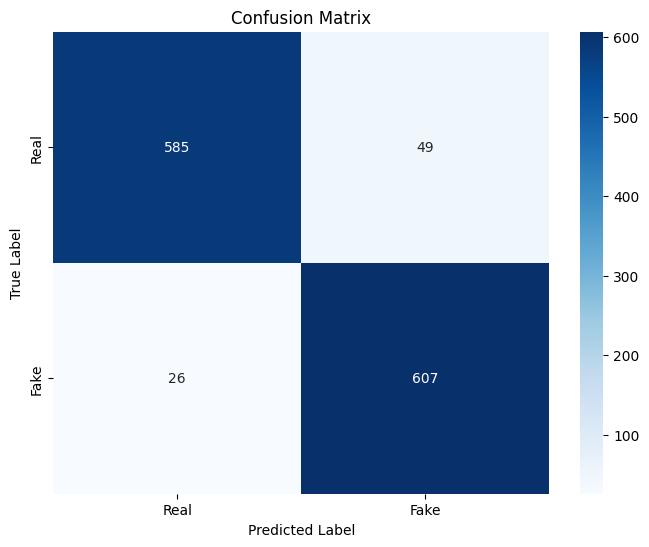

              precision    recall  f1-score   support

        Real       0.96      0.92      0.94       634
        Fake       0.93      0.96      0.94       633

    accuracy                           0.94      1267
   macro avg       0.94      0.94      0.94      1267
weighted avg       0.94      0.94      0.94      1267

Accuracy: 94.08%


In [115]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns

# Predictions on the test set
y_pred = clf.predict(x_test_vectorized)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
print(classification_report(y_test, y_pred, target_names=['Real', 'Fake']))

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")